In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 이거 실행하고 다시 런타임 시작
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (36.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
from glob import glob
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
#from pandasql import sqldf
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='NaNumBarunGothic')

# 경고 끄기
warnings.filterwarnings(action='ignore')

# 시드고정
tf.random.set_seed(19970119)
random.seed(19970119)
np.random.seed(19970119)

In [4]:

df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv')
df

,datadate,단가(원),거래량,해당일자_전체평균가격(원),주산지0_초기온도,주산지0_최대온도,주산지0_최저온도,주산지0_평균온도,주산지0_강수량(ml),주산지0_습도(%),...,수출금액(달러),수입중량(kg),수입금액(달러),무역수지(달러),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),일자별_소매가격_평균(원),일자별_소매가격_최소(원)
0,2013-01-01,0.000000,0.000000,0.000000,-3.9,4.4,-7.7,-1.4,0.0,0.0,...,0.0,1864728.0,1195211.0,-1195211.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,2013-01-02,16802.716667,7.333333,20712.240909,2.8,6.7,-1.1,3.5,0.0,0.0,...,0.0,1864728.0,1195211.0,-1195211.0,180000.0,178800.0,174000.0,5980.0,4298.522727,3210.0
2,2013-01-03,4454.533636,49.181818,3401.863678,-1.2,5.0,-6.3,-1.2,0.0,0.0,...,0.0,1864728.0,1195211.0,-1195211.0,180000.0,178800.0,174000.0,5980.0,4298.522727,3210.0
3,2013-01-04,5287.541667,46.500000,6553.903226,-1.7,6.8,-4.5,0.9,0.0,0.0,...,0.0,1864728.0,1195211.0,-1195211.0,180000.0,178800.0,174000.0,5980.0,4298.522727,3210.0
4,2013-01-05,6308.730000,72.529412,4299.079157,-4.6,6.2,-6.1,-0.7,0.0,0.0,...,0.0,1864728.0,1195211.0,-1195211.0,180000.0,178800.0,174000.0,5980.0,4298.522727,3210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54052,2016-12-27,0.000000,0.000000,0.000000,-1.7,10.1,-2.8,3.1,0.0,72.3,...,1810615.0,0.0,0.0,1810615.0,0.0,0.0,0.0,0.0,0.000000,0.0
54053,2016-12-28,2753.411286,1009.285714,2428.960251,0.4,11.7,-1.4,5.3,0.0,73.1,...,1810615.0,0.0,0.0,1810615.0,14000.0,13180.0,12000.0,700.0,507.500000,370.0
54054,2016-12-29,2799.843465,993.881890,2512.875229,-1.5,3.9,-4.6,-0.1,0.0,88.1,...,1810615.0,0.0,0.0,1810615.0,14300.0,13860.0,13000.0,700.0,510.681818,370.0
54055,2016-12-30,3053.932411,1039.475177,2665.738013,-4.6,-4.6,-12.3,-8.9,0.0,55.1,...,1810615.0,0.0,0.0,1810615.0,15300.0,14860.0,14000.0,700.0,515.681818,370.0


In [ ]:
df.columns

Index(['datadate', '단가(원)', '거래량', '해당일자_전체평균가격(원)', '주산지0_초기온도', '주산지0_최대온도',
       '주산지0_최저온도', '주산지0_평균온도', '주산지0_강수량(ml)', '주산지0_습도(%)', '주산지1_초기온도',
       '주산지1_최대온도', '주산지1_최저온도', '주산지1_평균온도', '주산지1_강수량(ml)', '주산지1_습도(%)',
       '주산지2_초기온도', '주산지2_최대온도', '주산지2_최저온도', '주산지2_평균온도', '주산지2_강수량(ml)',
       '주산지2_습도(%)', '품목', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)',
       '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)'],
      dtype='object')

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 14.6 MB/s 
     |████████████████████████████████| 133 kB 80.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=07adb9a36f89fa317f77642959e3af927d58358832b528094799f53c9dd29017
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
from glob import glob
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
# from pandasql import sqldf
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
<pre>
**순서**
1. 스케일링
2. 다중공선 확인하고 처리하고
3. OLS 유의 수준
4. lasso 회귀분석으로 feature selection


- 일단 baseline train data로 라쏘 회귀분석
- heatmatp
- OLS도 할건데 일단 보류

## Lasso 회귀분석 feature_selection

In [ ]:
# data_list = glob('/content/drive/MyDrive/농산물예측/aT_data/data/train/*.csv')
# train_sum = pd.DataFrame()
# for i in tqdm(data_list):
#     df_number = i.split("_")[-1].split(".")[0]
#     df = pd.read_csv(i)
#     train_sum = pd.concat([train_sum, df])
# train_sum.shape

100%|██████████| 37/37 [00:18<00:00,  2.02it/s]


(54057, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54057 entries, 0 to 54056
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datadate        54057 non-null  object 
 1   단가(원)           54057 non-null  float64
 2   거래량             54057 non-null  float64
 3   해당일자_전체평균가격(원)  54057 non-null  float64
 4   주산지0_초기온도       54057 non-null  float64
 5   주산지0_최대온도       54057 non-null  float64
 6   주산지0_최저온도       54057 non-null  float64
 7   주산지0_평균온도       54057 non-null  float64
 8   주산지0_강수량(ml)    54057 non-null  float64
 9   주산지0_습도(%)      54057 non-null  float64
 10  주산지1_초기온도       54057 non-null  float64
 11  주산지1_최대온도       54057 non-null  float64
 12  주산지1_최저온도       54057 non-null  float64
 13  주산지1_평균온도       54057 non-null  float64
 14  주산지1_강수량(ml)    54057 non-null  float64
 15  주산지1_습도(%)      54057 non-null  float64
 16  주산지2_초기온도       54057 non-null  float64
 17  주산지2_최대온도       54057 non-null 

In [ ]:
df2 = df.drop('datadate', axis=1)
X_train = df2.drop(['품목', '해당일자_전체평균가격(원)'] ,axis=1)
y_train = df2['해당일자_전체평균가격(원)']


from sklearn import linear_model
regressor = linear_model.Lasso(alpha=100,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
regressor.fit(X_train, y_train)


import eli5
eli5.show_weights(regressor, top=-1, feature_names = X_train.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+09, tolerance: 6.720e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Weight?,Feature
+23.020,주산지2_최대온도
+16.357,주산지0_최대온도
+12.590,주산지0_습도(%)
+2.631,주산지1_습도(%)
+0.536,주산지0_강수량(ml)
+0.023,일자별_도매가격_최대(원)
+0.011,단가(원)
+0.002,일자별_도매가격_평균(원)
+0.000,수출금액(달러)
+0.000,수입금액(달러)


- 위에 컬럼들로만 돌려보는건 6차 도전에 해보자
- 주산지2_최대온도, 주산지0_최대온도, 주산지0_습도(%), 주산지0_강수량(ml), 일자별_도매가격_최대(원), 단가(원), 일자별_도매가격_평균(원), 수출금액(달러), 수입금액(달러), 무역수지(달러)

## 상관관계 분석 - heatmap

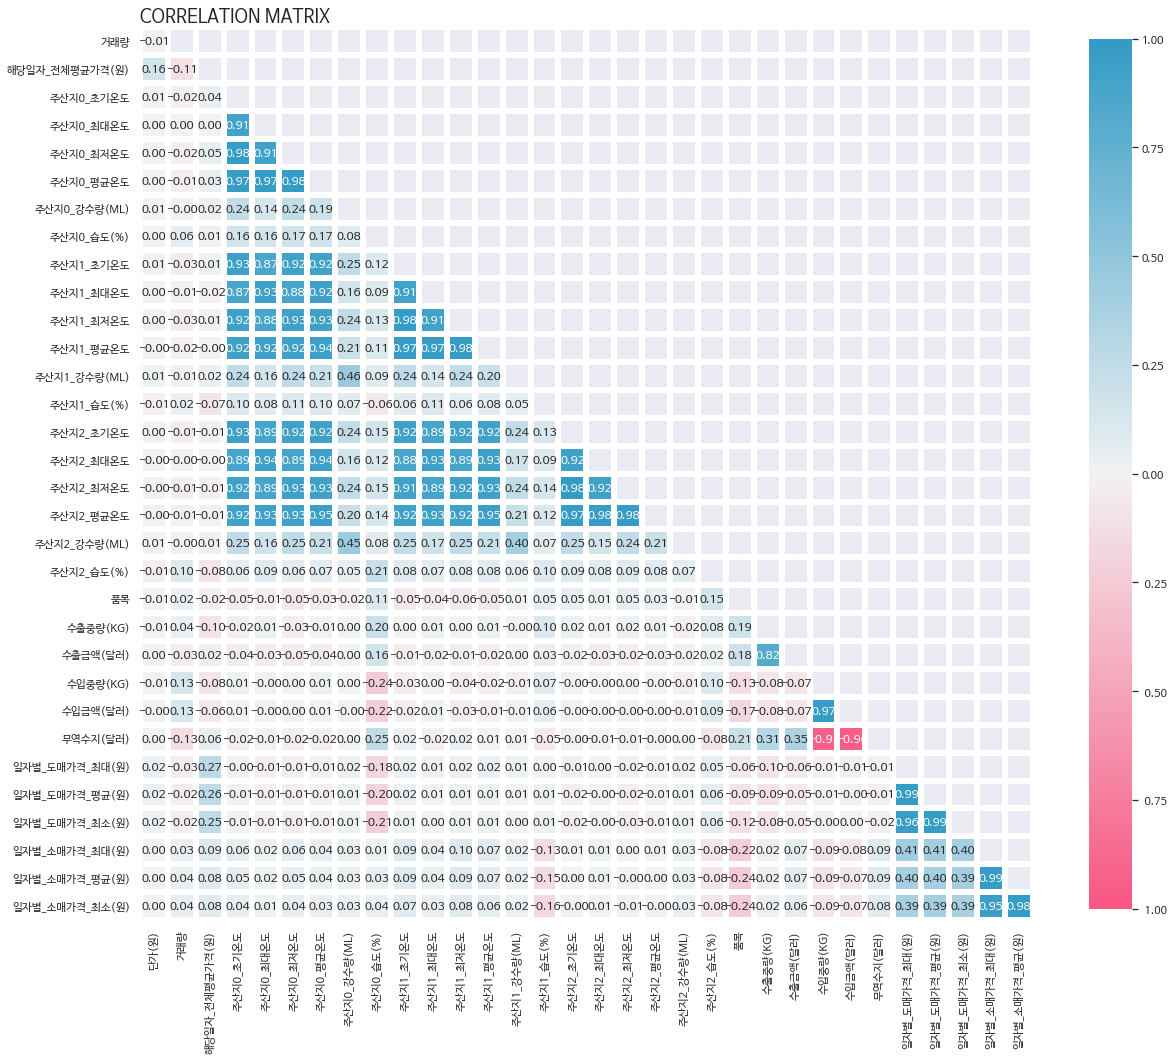

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv')

fig, ax = plt.subplots(figsize=(20, 20))

df_corr = df.corr()
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title

title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
plt.show()

- 위에 보고 다중공선 있는 컬럼들끼리 보고 회귀분석 feature selection이랑 비교해서 feature 선정

1. 다중공선
- 일단 도매가격은 '최소' 선택
- 날씨는 주산지0최대온도, 주산지2최대온도 쓰기
- 소매가격은 어떤거 쓸지 보고 비교

In [5]:
df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv')
len(df.columns)

34

## OLS Report
- 유의수준 0.05 이하인 컬럼 뽑아내기

In [ ]:
# concat된 데이터로 한거임   -> 우리는 한개씩 불러와서 할거니깐 이건 참고용 코드~~
df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv') 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm




df.columns = df.columns.str.replace(r'\([^)]*\)','',regex= True) # 컬럼에서 문자 기호 같은거 있으면 OLS 안돌아간다.
def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("해당일자_전체평균가격 ~단가+거래량+주산지0_초기온도+주산지0_최대온도+주산지0_최저온도+ 주산지0_평균온도+주산지0_강수량+ 주산지0_습도+주산지1_초기온도+주산지1_최대온도+주산지1_최저온도+주산지1_평균온도+주산지1_강수량+ 주산지1_습도+주산지2_초기온도+주산지2_최대온도+주산지2_최저온도+주산지2_평균온도+주산지2_강수량+주산지2_습도 +품목+수출중량+수출금액+수입중량+수입금액+무역수지+일자별_도매가격_최대+일자별_도매가격_평균+일자별_도매가격_최소+일자별_소매가격_최대+일자별_소매가격_평균+일자별_소매가격_최소"
                                ,data=df)
    return model.fit()


result1 = get_model1(42)



def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    # conf_lower = results.conf_int()[0]
    # conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff
                              #  "conf_lower":conf_lower,
                              #  "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals"]]
    return results_df



ols_report_df = results_summary_to_dataframe(result1).reset_index()
ols_report_df = ols_report_df[ols_report_df['index'] !='Intercept']
selected_col = list(ols_report_df[ols_report_df['pvals']<0.05]['index'].values)

selected_col

['단가',
 '거래량',
 '주산지0_초기온도',
 '주산지0_최대온도',
 '주산지0_최저온도',
 '주산지0_평균온도',
 '주산지0_강수량',
 '주산지0_습도',
 '주산지1_평균온도',
 '주산지1_습도',
 '주산지2_초기온도',
 '주산지2_최대온도',
 '주산지2_평균온도',
 '주산지2_습도',
 '품목',
 '수출중량',
 '수출금액',
 '수입중량',
 '수입금액',
 '무역수지',
 '일자별_도매가격_평균',
 '일자별_도매가격_최소',
 '일자별_소매가격_최대',
 '일자별_소매가격_평균',
 '일자별_소매가격_최소']

In [ ]:
def OLS_report(df, seed):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("해당일자_전체평균가격 ~단가+거래량+주산지0_초기온도+주산지0_최대온도+주산지0_최저온도+ 주산지0_평균온도+주산지0_강수량+ 주산지0_습도+주산지1_초기온도+주산지1_최대온도+주산지1_최저온도+주산지1_평균온도+주산지1_강수량+ 주산지1_습도+주산지2_초기온도+주산지2_최대온도+주산지2_최저온도+주산지2_평균온도+주산지2_강수량+주산지2_습도 +품목+수출중량+수출금액+수입중량+수입금액+무역수지+일자별_도매가격_최대+일자별_도매가격_평균+일자별_도매가격_최소+일자별_소매가격_최대+일자별_소매가격_평균+일자별_소매가격_최소"
                                ,data=df)
    return model.fit()

def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    # conf_lower = results.conf_int()[0]
    # conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff
                              #  "conf_lower":conf_lower,
                              #  "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals"]]
    return results_df


df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv')
for i in range(37):
  df2 = df[df['품목']==i]
  df2.columns = df2.columns.str.replace(r'\([^)]*\)','',regex= True) # 컬럼에서 문자 기호 같은거 있으면 OLS 안돌아간다.


  result1 = OLS_report(df2, 42)



  ols_report_df = results_summary_to_dataframe(result1).reset_index()
  ols_report_df = ols_report_df[ols_report_df['index'] !='Intercept']
  selected_col = list(ols_report_df[ols_report_df['pvals']<0.05]['index'].values)

  print(f'{i}번 품목의 selected_feature: {selected_col}')



0번 품목의 selected_feature: ['단가', '주산지2_최저온도', '주산지2_평균온도', '일자별_도매가격_평균', '일자별_소매가격_최대', '일자별_소매가격_최소']
1번 품목의 selected_feature: ['단가', '거래량', '주산지1_습도', '주산지2_습도', '수출중량', '일자별_소매가격_최대']
2번 품목의 selected_feature: ['단가', '주산지0_습도', '주산지2_초기온도', '주산지2_최대온도', '수출중량', '수출금액', '수입금액', '무역수지', '일자별_도매가격_최대', '일자별_소매가격_평균', '일자별_소매가격_최소']
3번 품목의 selected_feature: ['단가', '거래량', '주산지1_최저온도', '주산지2_최저온도', '주산지2_평균온도', '수출금액', '수입금액', '일자별_도매가격_최대', '일자별_도매가격_평균', '일자별_소매가격_평균', '일자별_소매가격_최소']
4번 품목의 selected_feature: ['단가', '거래량', '주산지0_습도', '주산지1_최저온도', '주산지1_습도', '주산지2_습도', '품목', '일자별_도매가격_최대', '일자별_도매가격_평균']
5번 품목의 selected_feature: ['단가', '거래량', '주산지0_강수량', '주산지2_최저온도', '주산지2_습도', '품목', '수출금액', '수입중량', '수입금액', '일자별_도매가격_평균', '일자별_도매가격_최소', '일자별_소매가격_최대', '일자별_소매가격_평균', '일자별_소매가격_최소']
6번 품목의 selected_feature: ['단가', '주산지0_습도', '주산지1_최대온도', '무역수지']
7번 품목의 selected_feature: ['단가', '거래량', '일자별_도매가격_최대']
8번 품목의 selected_feature: ['단가', '주산지1_평균온도', '일자별_도매가격_최소', '일자별_소매가격_최소']
9번 품목의 selected_fea

In [6]:
# 이거는 나중에 작성하든가 하자

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# /content/drive/MyDrive/농산물예측/aT_data/data/train
# data_list = glob('/content/drive/MyDrive/농산물예측/aT_data/data/train/*')
def feature_selection_by_ols(dir): # train 데이터 기준으로 feature selection 할거다.
  data_list = glob(dir)
  for i in tqdm(data_list):
    pummok_number = i.split('_')[-1].split('.')[0]

In [ ]:
ols_report_df[ols_report_df['pvals']<0.05]['index']

1              단가
2             거래량
3       주산지0_초기온도
4       주산지0_최대온도
5       주산지0_최저온도
6       주산지0_평균온도
7        주산지0_강수량
8         주산지0_습도
12      주산지1_평균온도
14        주산지1_습도
15      주산지2_초기온도
16      주산지2_최대온도
18      주산지2_평균온도
20        주산지2_습도
21             품목
22           수출중량
23           수출금액
24           수입중량
25           수입금액
26           무역수지
28    일자별_도매가격_평균
29    일자별_도매가격_최소
30    일자별_소매가격_최대
31    일자별_소매가격_평균
32    일자별_소매가격_최소
Name: index, dtype: object

In [7]:
!pip install talib-binary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 25.8 MB/s 


# Time SERIES 잡음 제거
- 시간에 따른 정보(Information)와 잡음(noise)을 살펴보았을 때 규칙성이 없고 분산이 일정하지 않으면 안된다.
- 등분산성이 가정되지 않는다면 비정상 시계열이라 표현되며 잡음(Noise)이 정보(information)에 비해 상대적으로 더 큰 영향을 미친다. 
- 좋은 정보량을 잡음으로 인해 잃게 되고 다음 가격은 현재 가격과 잡음으로 구성된 것처럼 설명하기에 예측 모델이 잔차를 최소화하기 위해 후행 예측을 야기하게 된다.

1. wma 방식 사용 -> 가중치 이동평균선
2. 잡음 제거 방식으로 푸리에 변환(FFT)와
3. 오토 인코더(AE)모델을 사용해보자


In [ ]:
import talib as tb

In [ ]:
df.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월'],
      dtype='object')

In [ ]:
df2 = df[df['품목']==2]
df2['price']  = df2['해당일자_전체평균가격(원)']

In [10]:
import talib as tb
df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv')
for i in range(37):
  df2 = df[df['품목']==i]
  df2['price'] = df['해당일자_전체평균가격(원)']
  df2['wma7'] =  tb.WMA(df2['price'], 7)
  df2['wma14'] =  tb.WMA(df2['price'], 14)
  df2['wma13'] =  tb.WMA(df2['price'], 13)
  df2['wma12'] =  tb.WMA(df2['price'], 12)
  df2['wma28'] =  tb.WMA(df2['price'], 28)
  df2['wma10'] =  tb.WMA(df2['price'], 10)
  plt.figure(figsize=(20,6))
  plt.plot(df2['price'], marker='+', color='g')
  
  #plt.plot(df2['wma28'],  marker='*', color='r')
  # plt.plot(df2['wma28']*1.2,  marker='*', color='r')
  # plt.plot(df2['price'].rolling(28).mean(),  marker='*', color='yellow')
  plt.plot(df2['wma14'],  marker='*', color='b')
  plt.plot(df2['wma14']*1.2,  marker='s', color='yellow')
  # plt.plot(df2['price'].rolling(14).mean(),  marker='*', color='red')
  # plt.plot(df2['wma28'])


  # df2['wma7'].plot(kind='line')
  # df2['wma14'].plot(kind='line')
  # df2['wma28'].plot(kind='line')
  # df2['price'].plot(kind='line')
  plt.suptitle(f'{i} 품목의 해당일자_전체평균가격(원)')
  plt.show()
  plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import talib as tb
df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv')
for i in range(37):
  df2 = df[df['품목']==i]
  df2['price'] = df['해당일자_전체평균가격(원)']
  df2['wma7'] =  tb.WMA(df2['price'], 7)
  df2['wma14'] =  tb.WMA(df2['price'], 14)
  df2['wma13'] =  tb.WMA(df2['price'], 13)
  df2['wma12'] =  tb.WMA(df2['price'], 12)
  df2['wma28'] =  tb.WMA(df2['price'], 28)
  df2['wma10'] =  tb.WMA(df2['price'], 10)
  plt.figure(figsize=(20,6))
  plt.plot(df2['price'], marker='+', color='g')
  
  #plt.plot(df2['wma28'],  marker='*', color='r')
  # plt.plot(df2['wma28']*1.2,  marker='*', color='r')
  # plt.plot(df2['price'].rolling(28).mean(),  marker='*', color='yellow')
  plt.plot(df2['wma14'],  marker='*', color='b')
  plt.plot(df2['wma14']*1.2,  marker='s', color='yellow')
  # plt.plot(df2['price'].rolling(14).mean(),  marker='*', color='red')
  # plt.plot(df2['wma28'])


  # df2['wma7'].plot(kind='line')
  # df2['wma14'].plot(kind='line')
  # df2['wma28'].plot(kind='line')
  # df2['price'].plot(kind='line')
  plt.suptitle(f'{i} 품목의 해당일자_전체평균가격(원)')
  plt.show()
  plt.close()

In [12]:
df2['해당일자_전체평균가격(원)'].replace(0,np.nan, inplace = True)

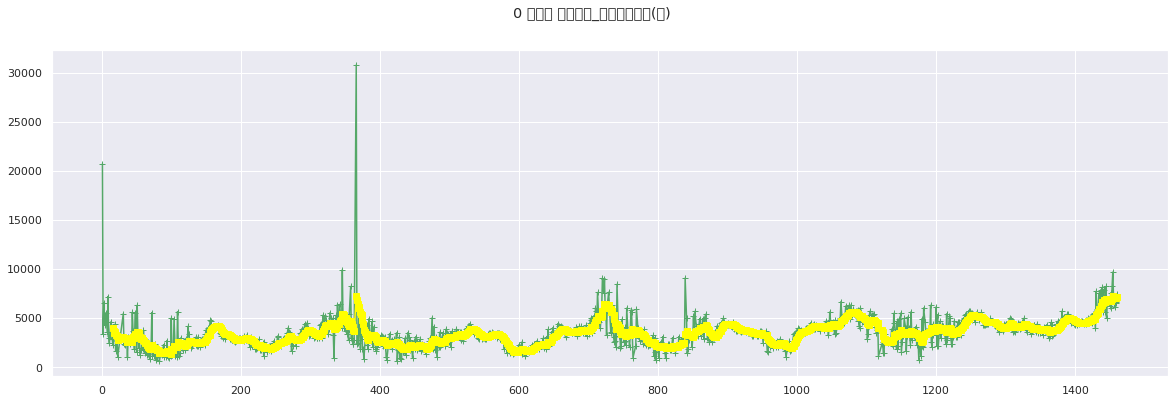

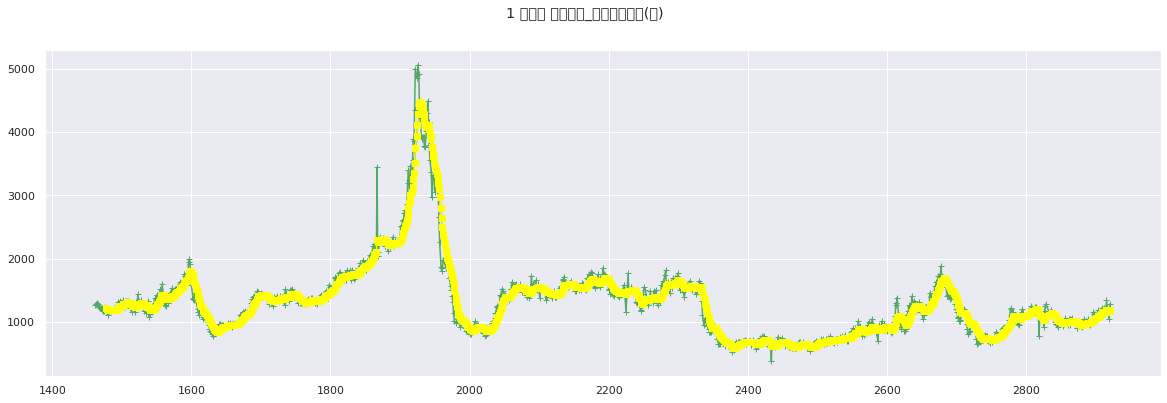

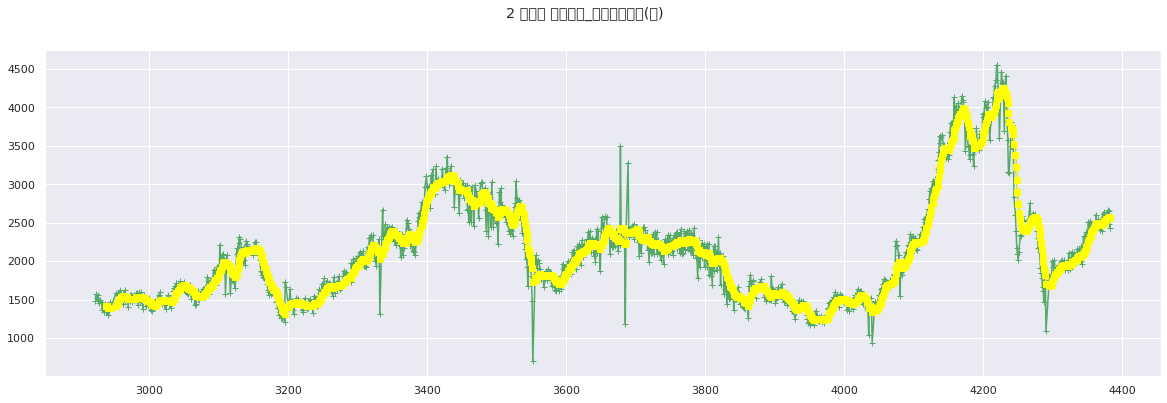

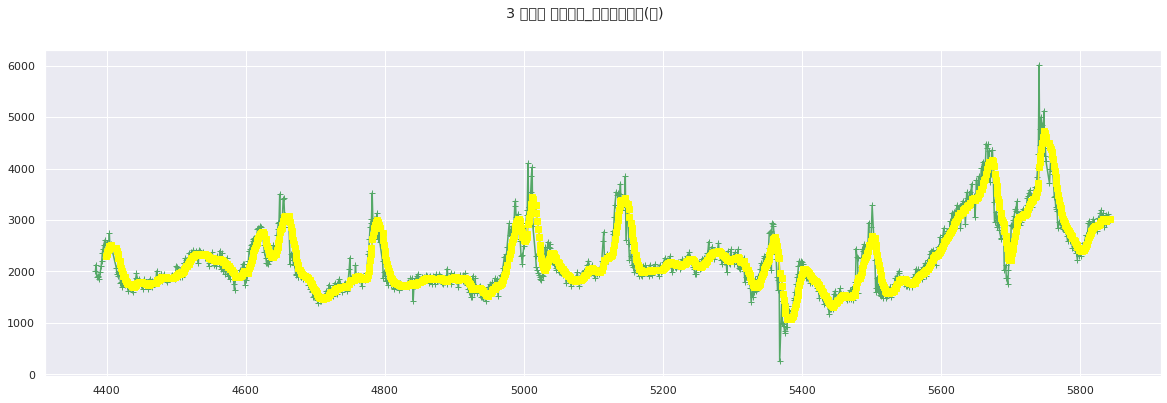

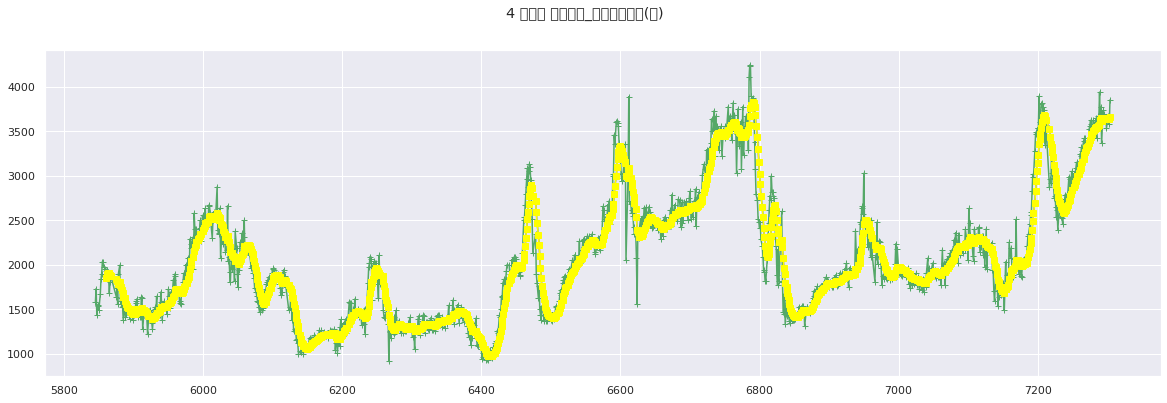

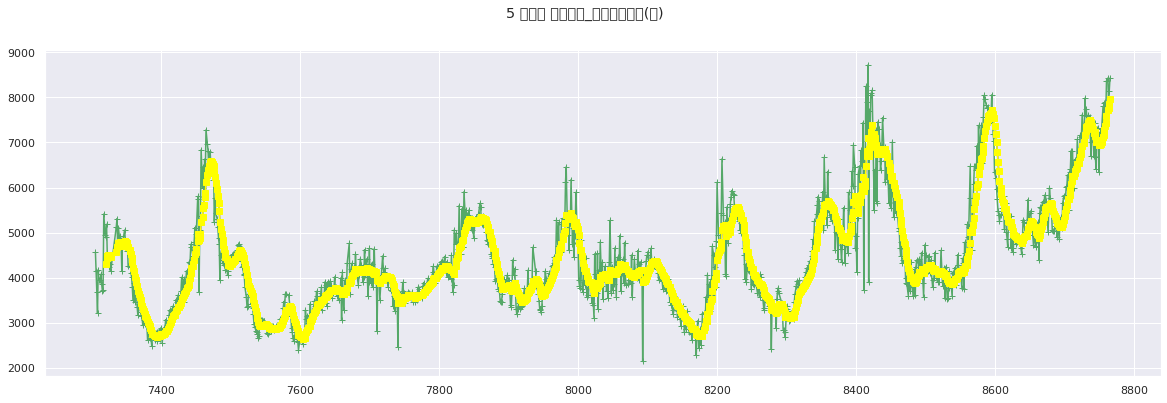

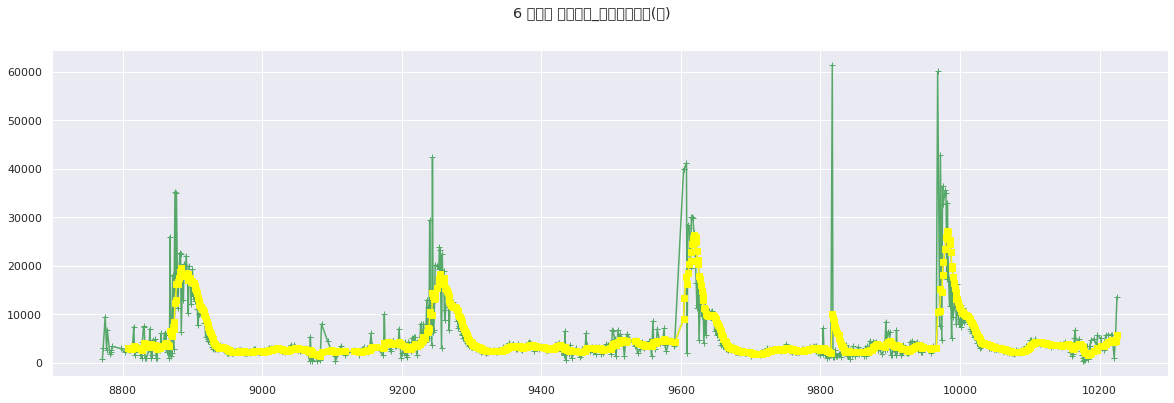

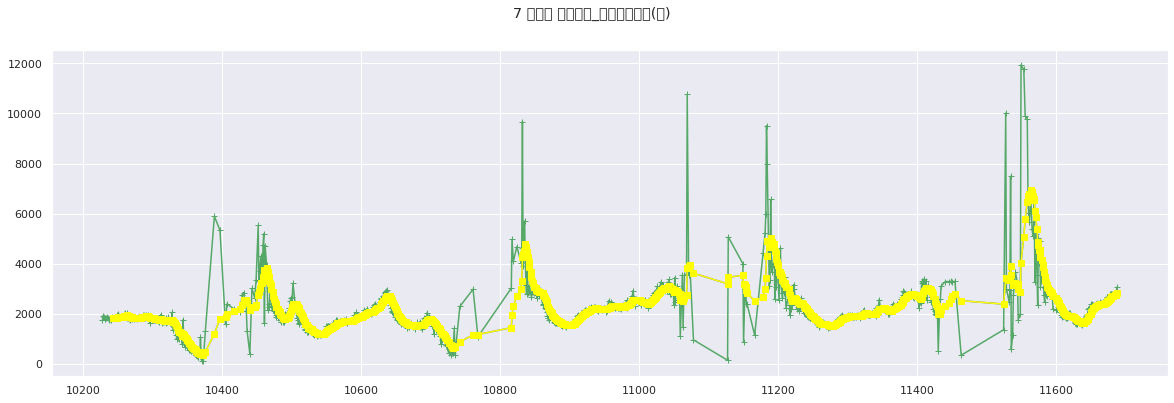

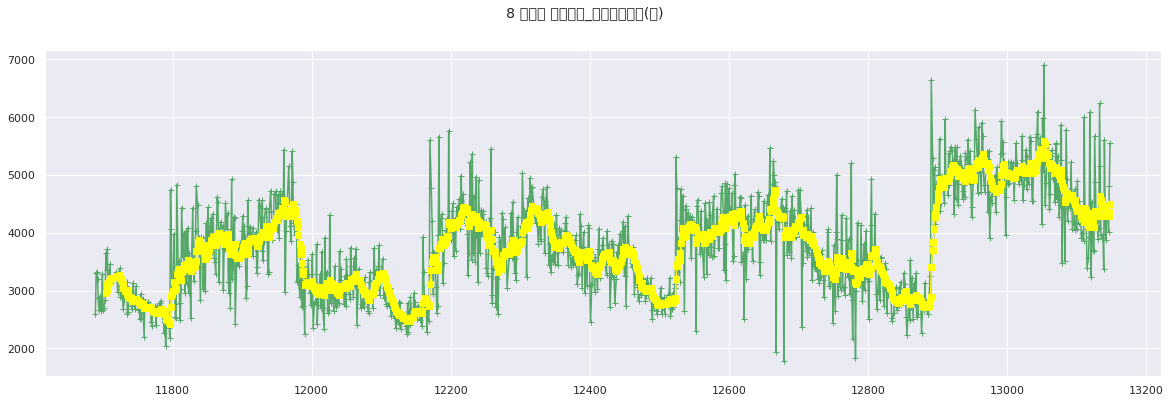

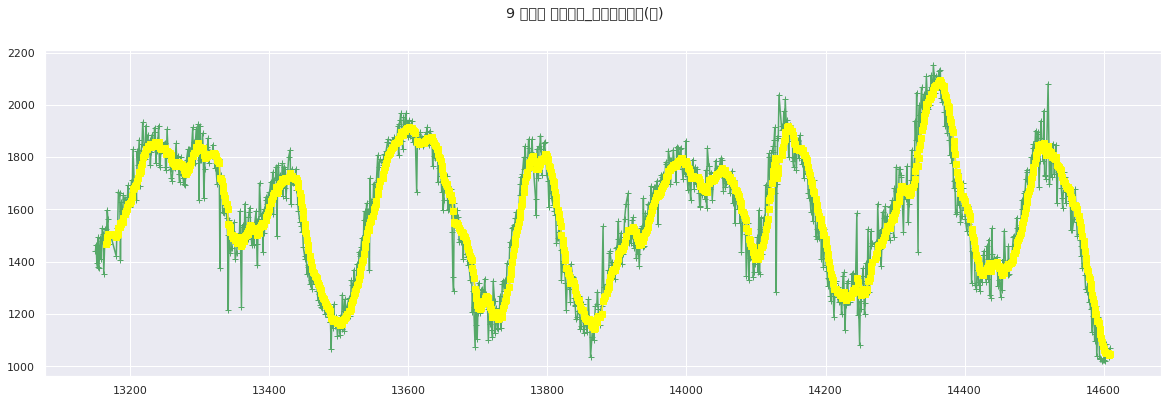

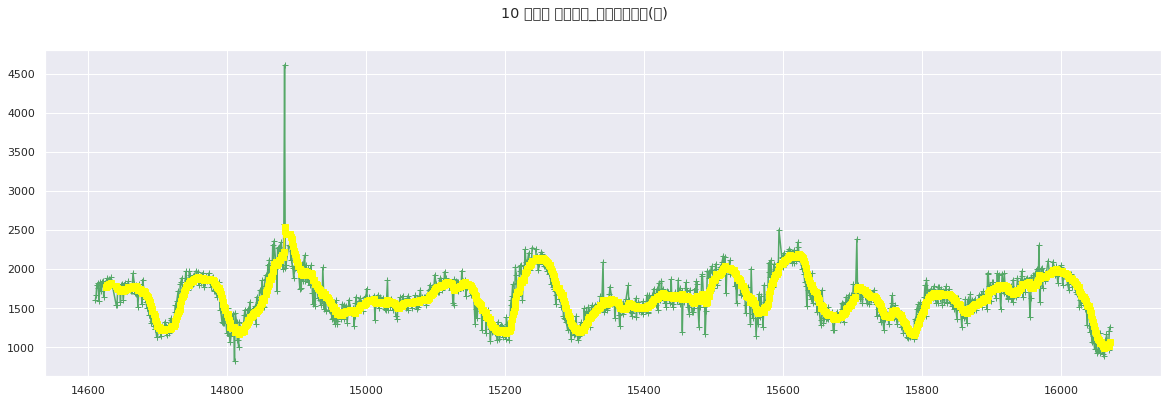

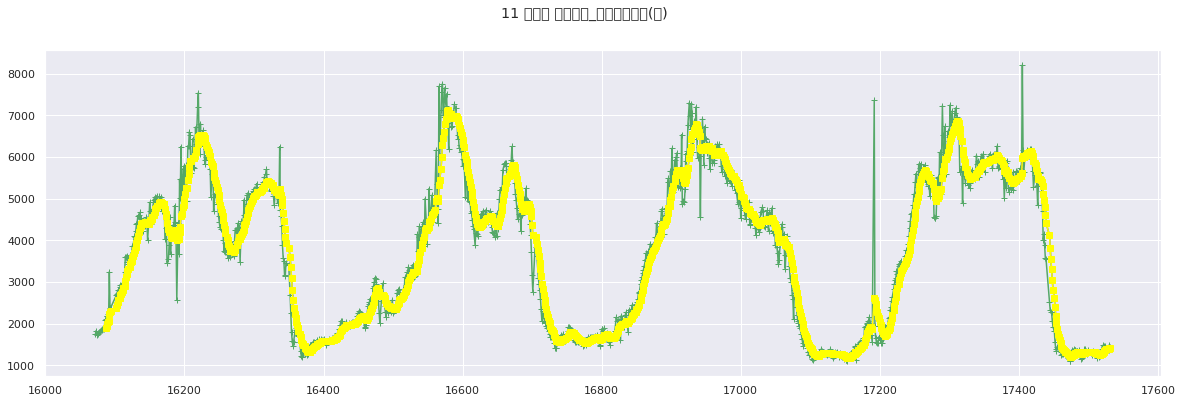

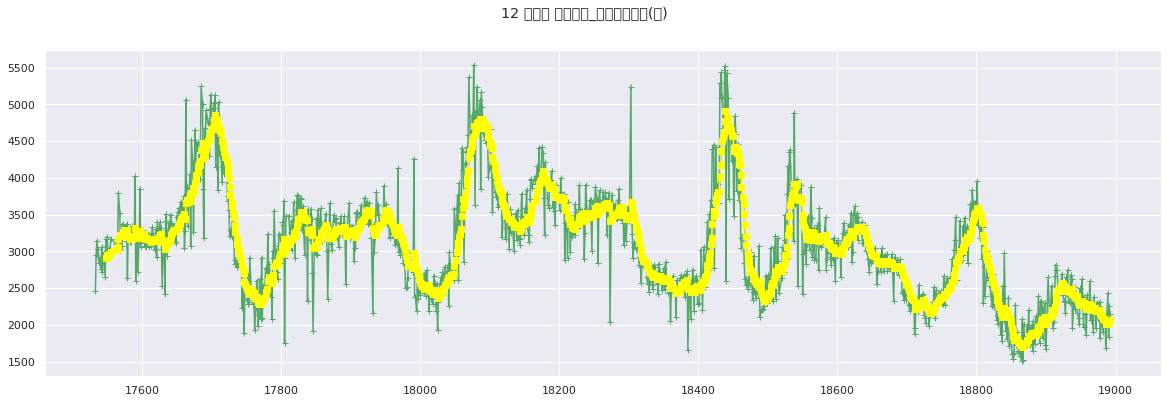

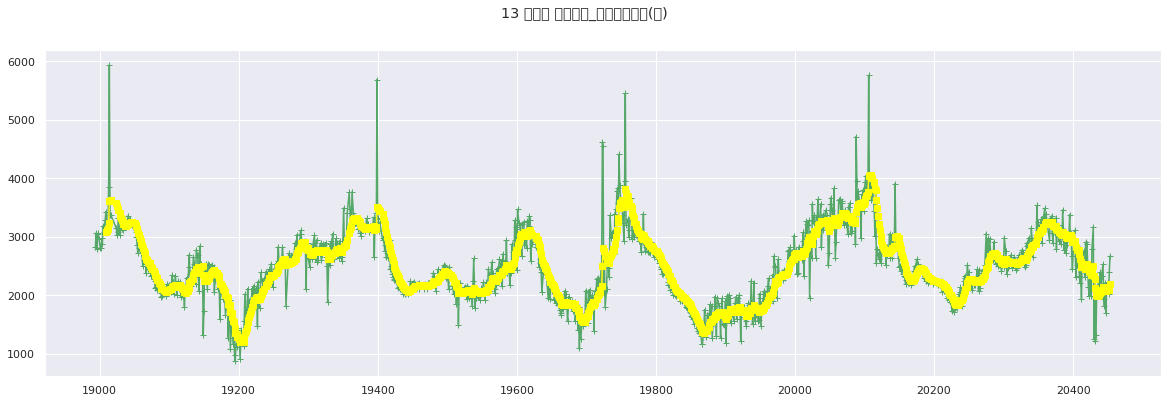

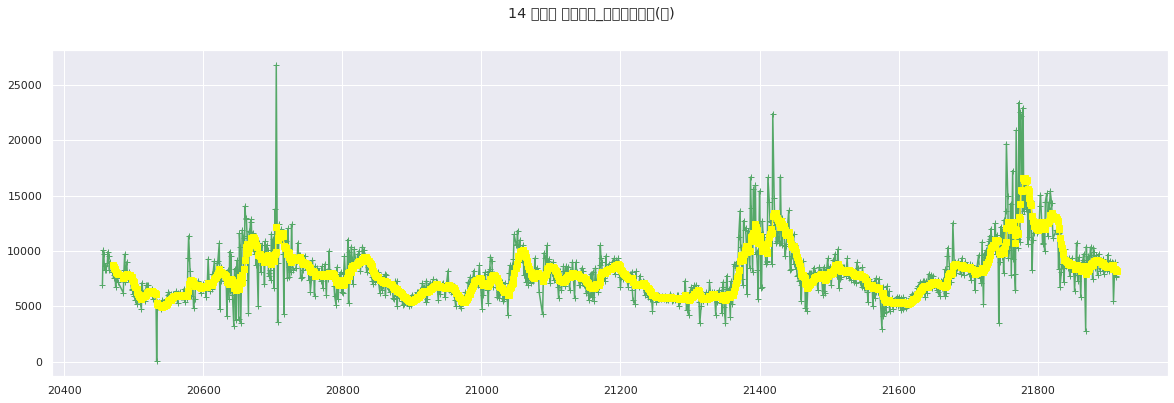

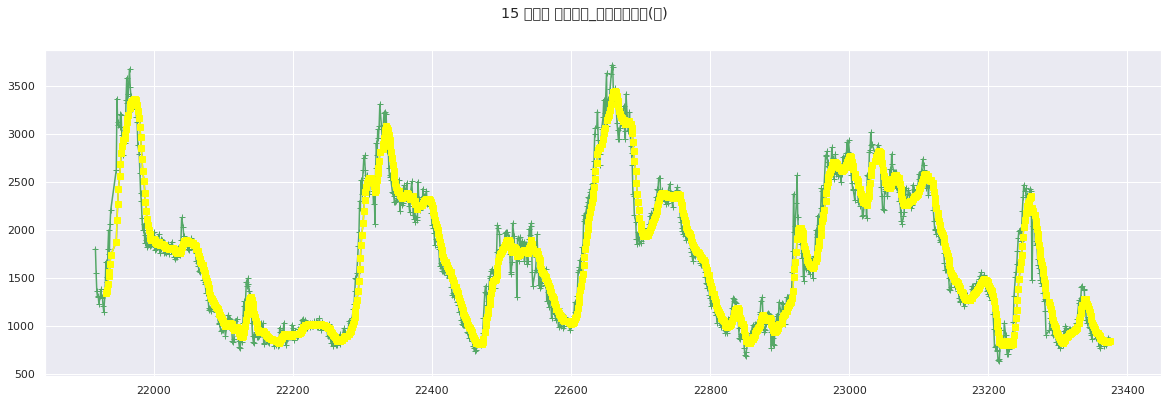

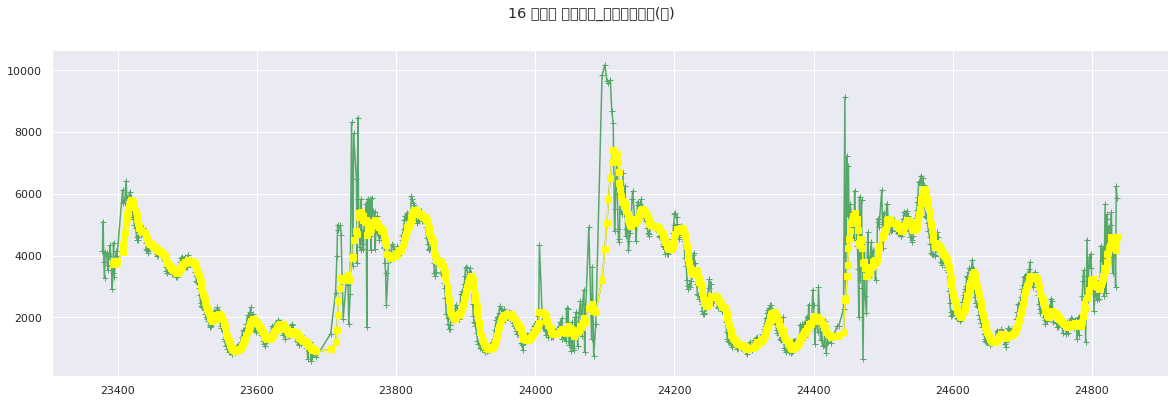

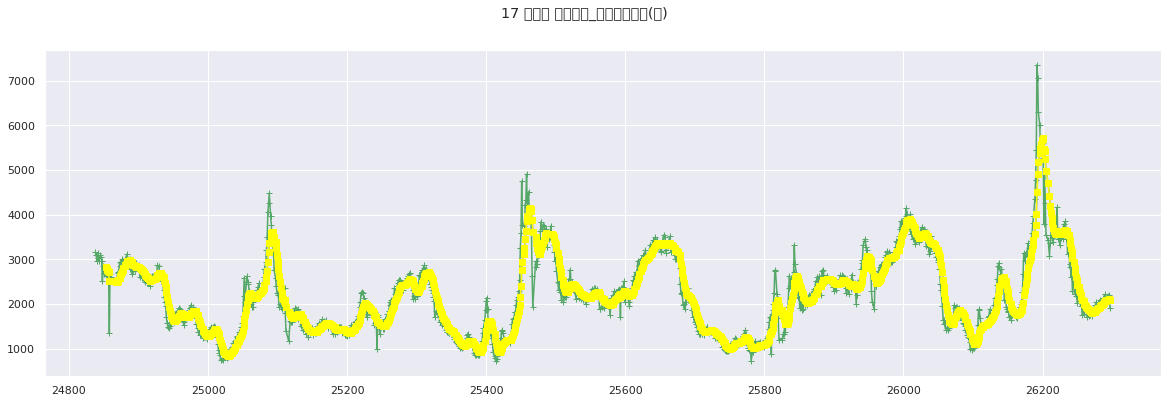

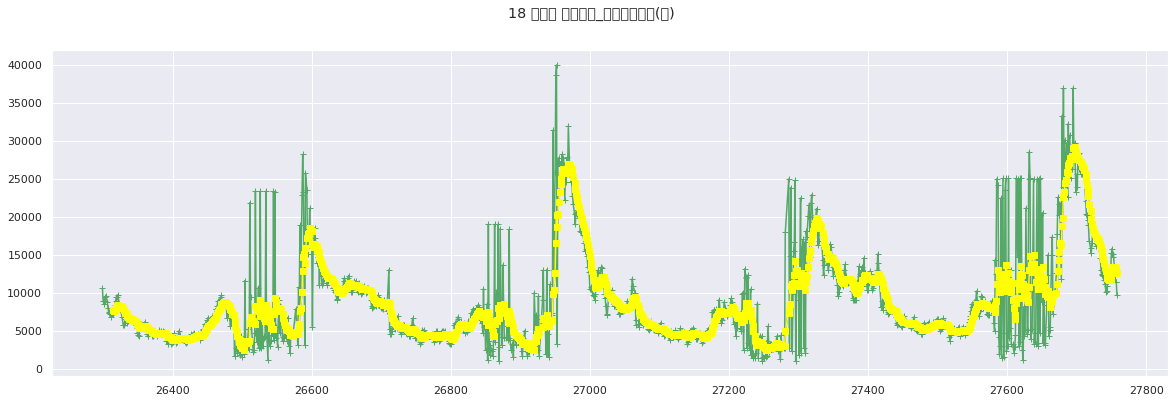

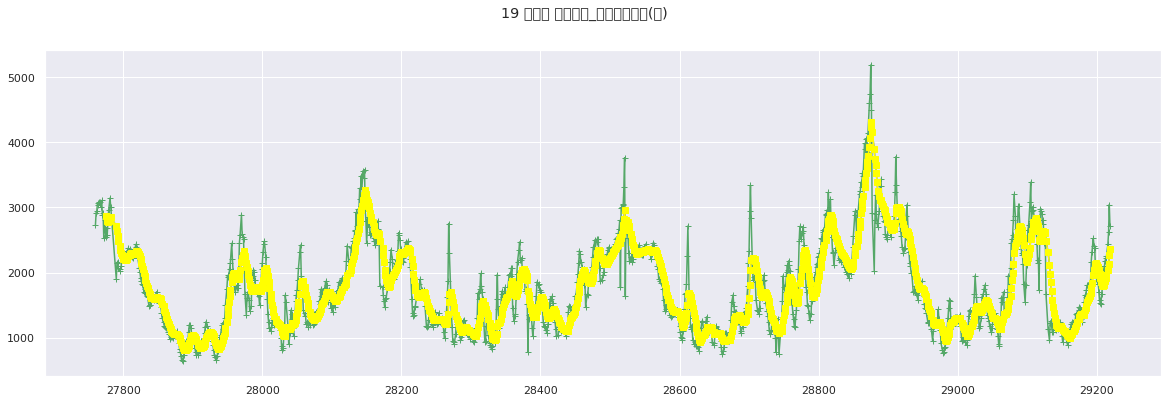

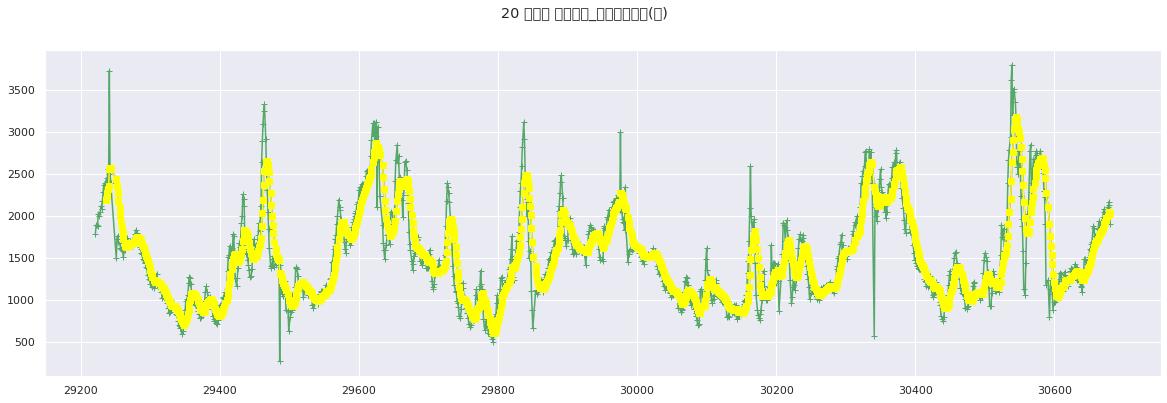

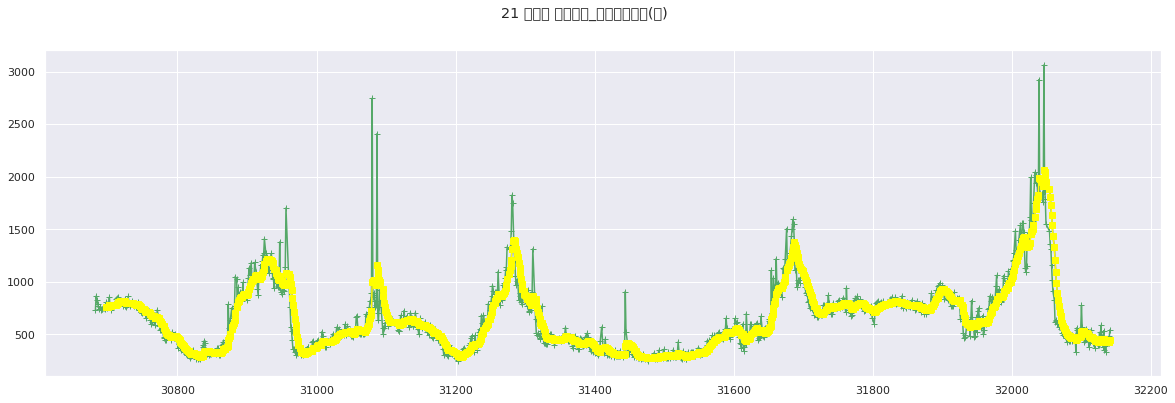

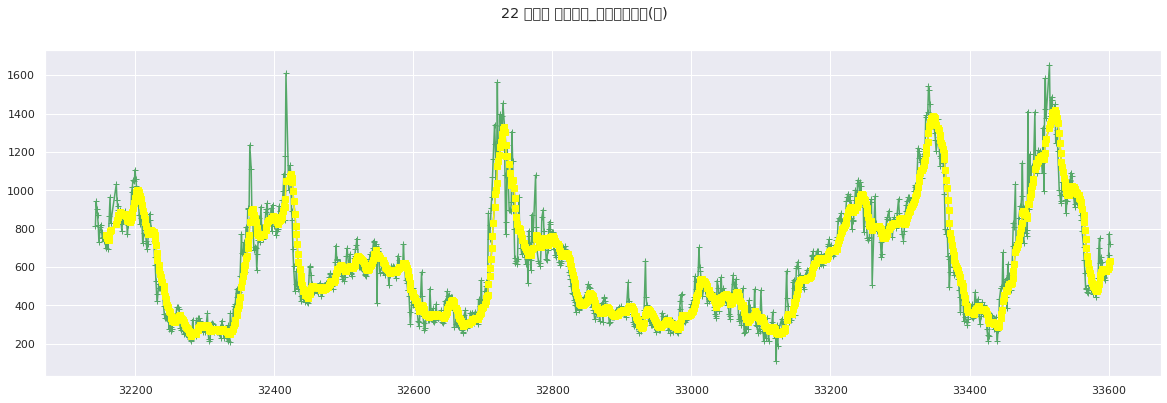

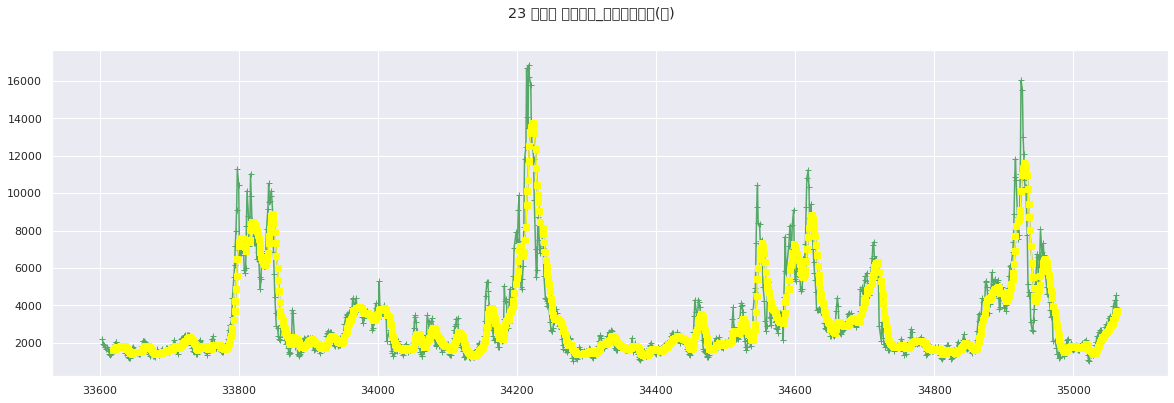

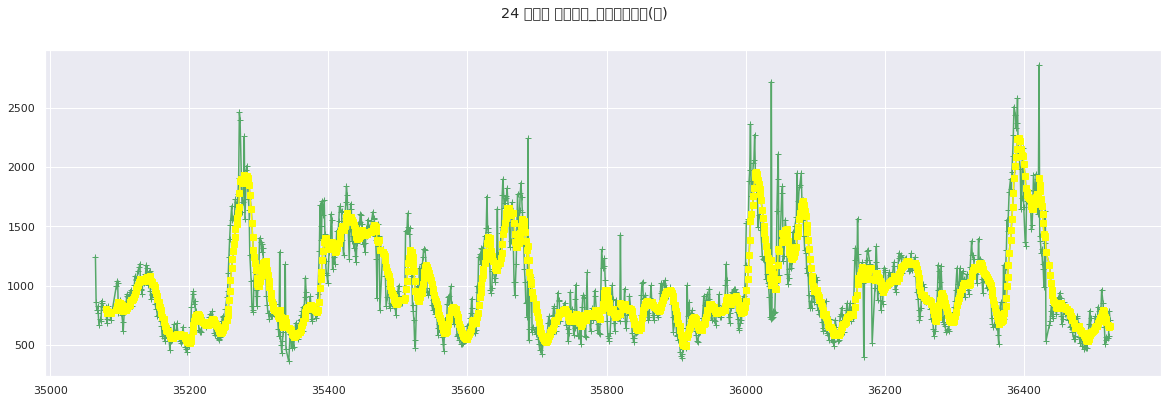

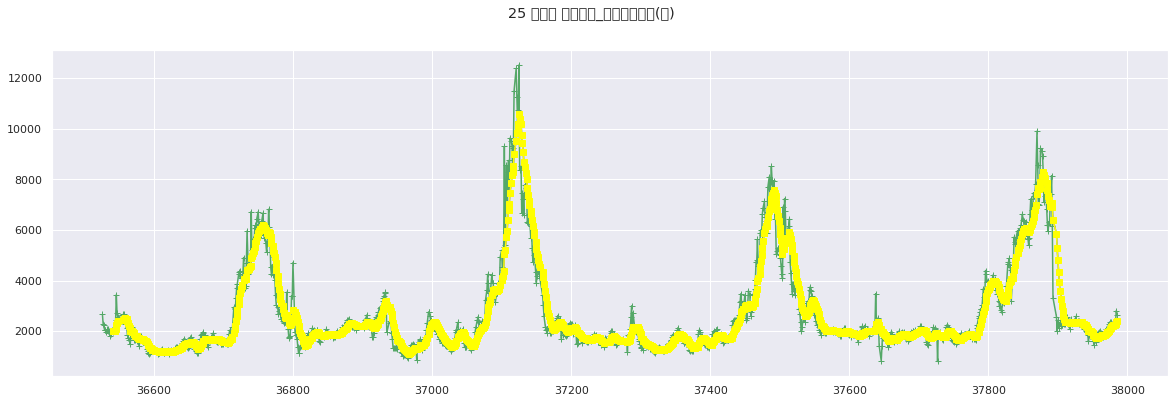

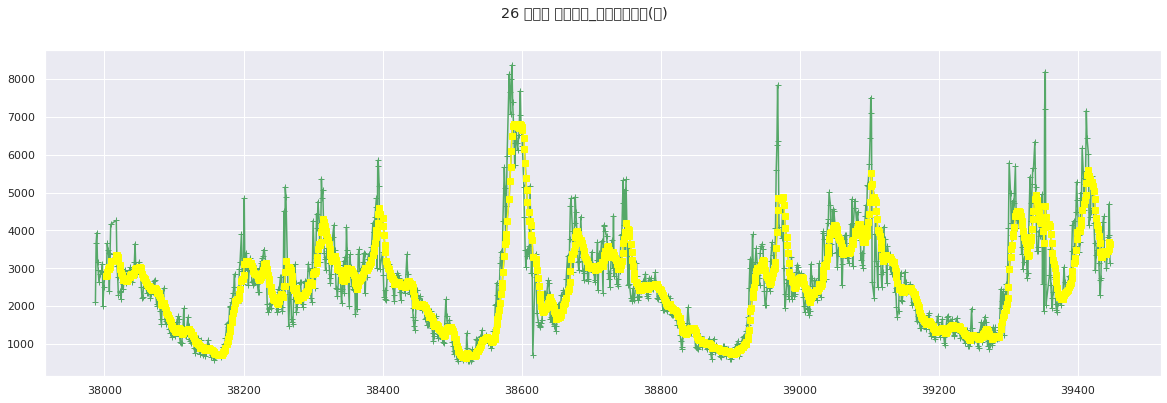

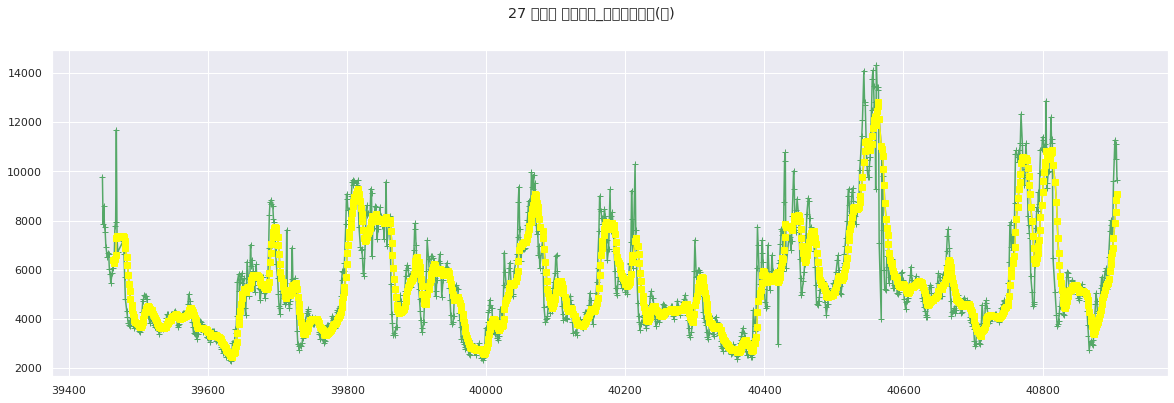

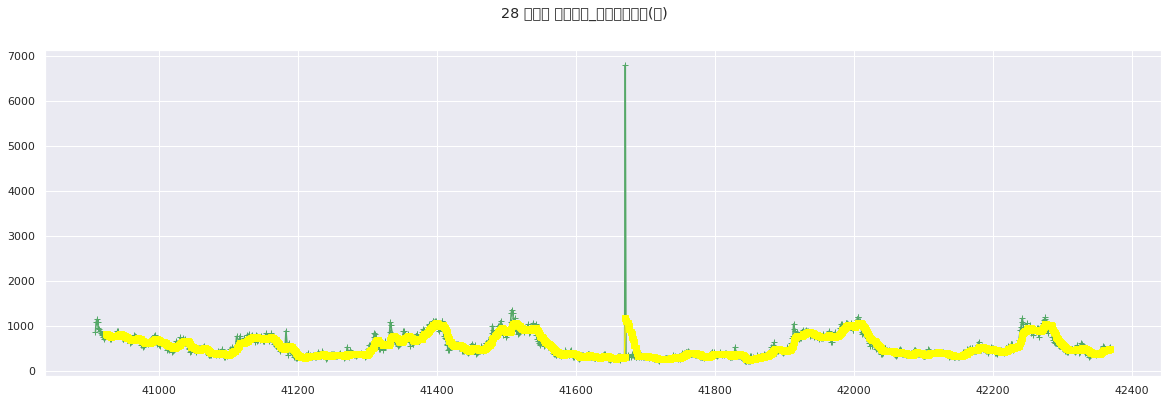

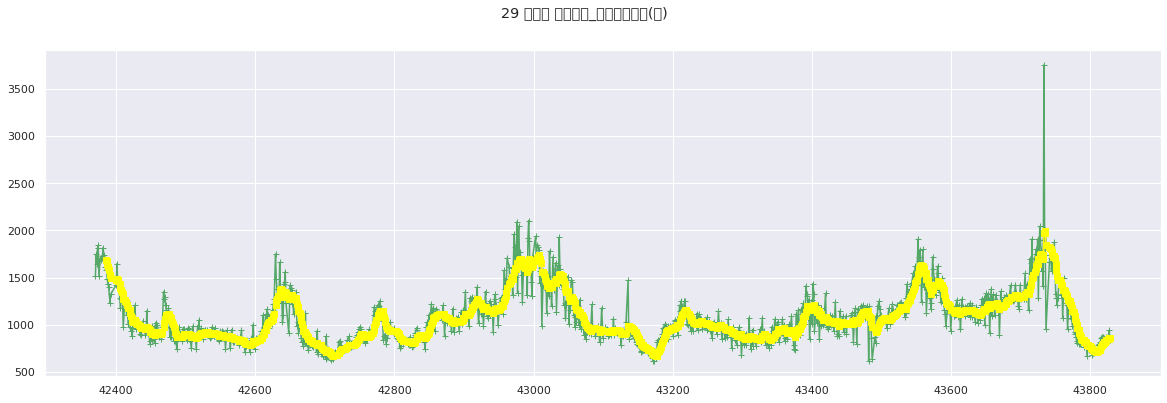

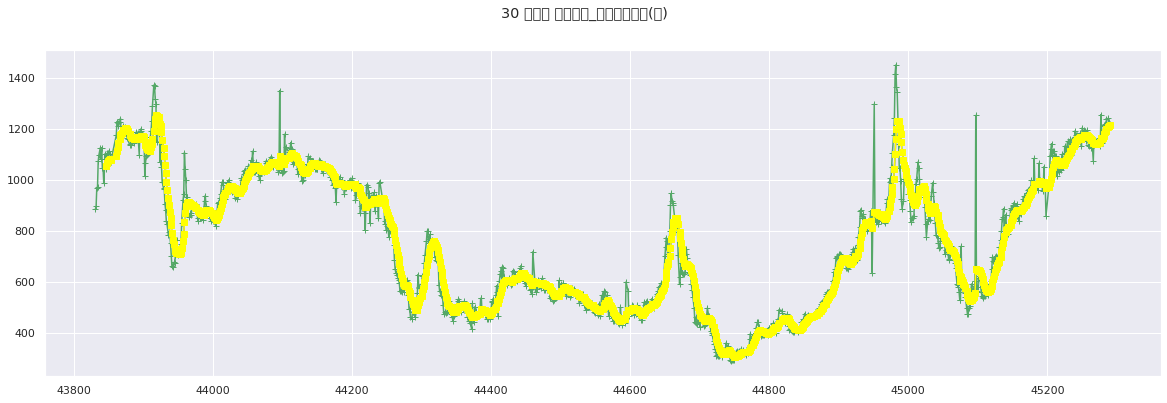

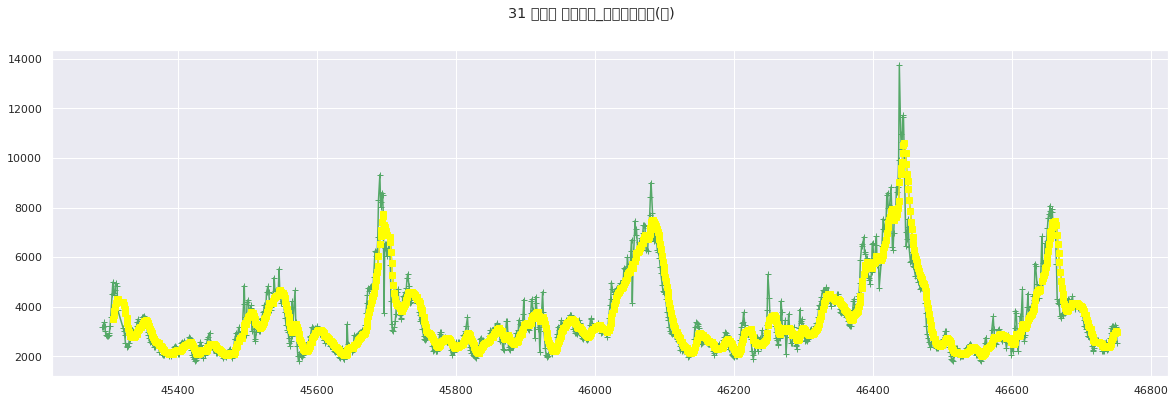

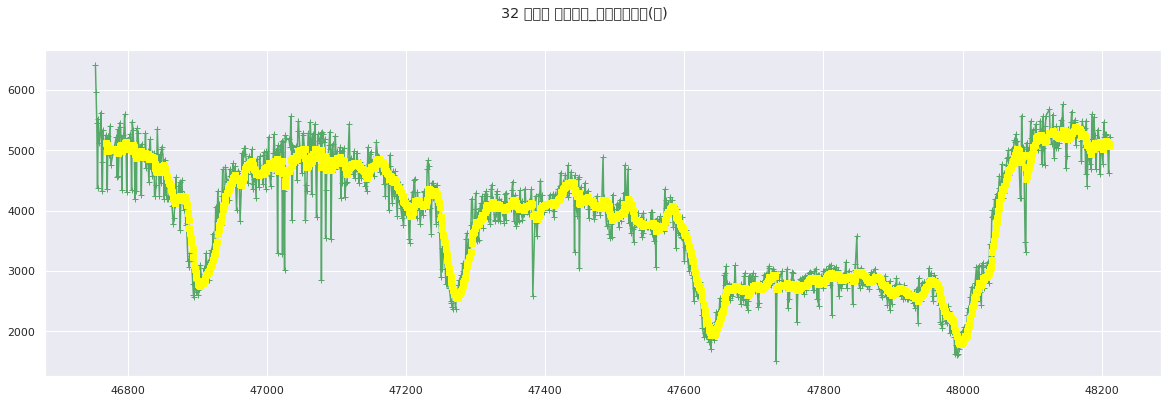

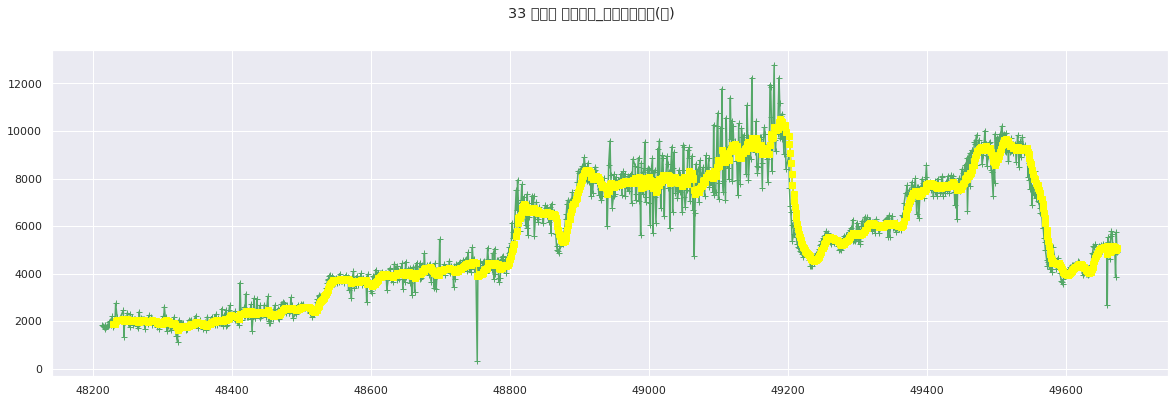

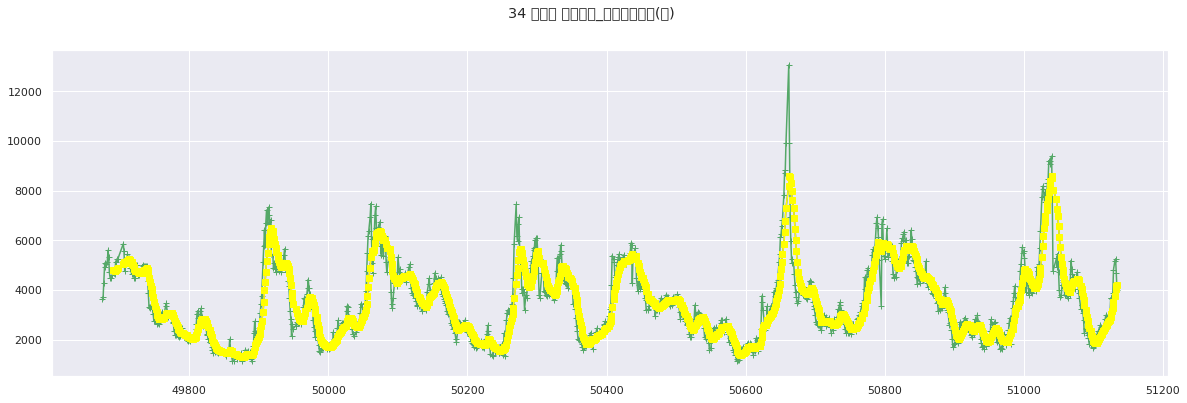

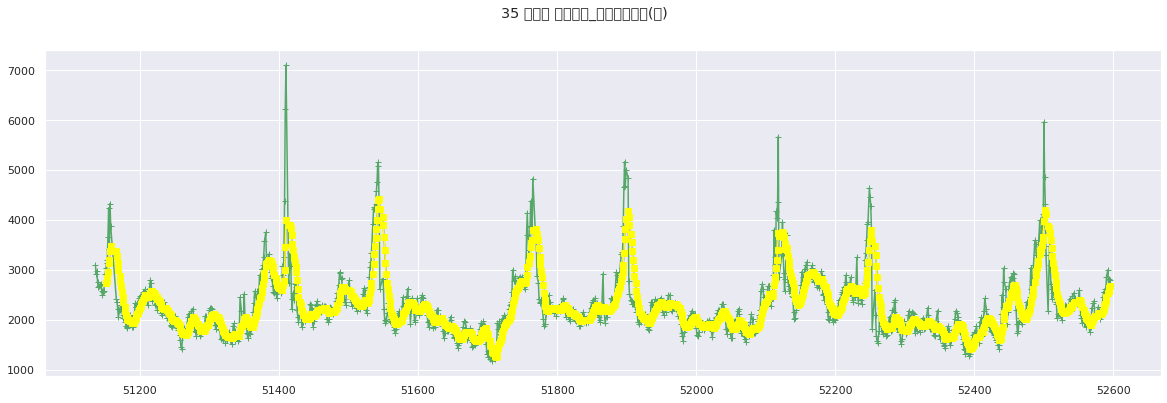

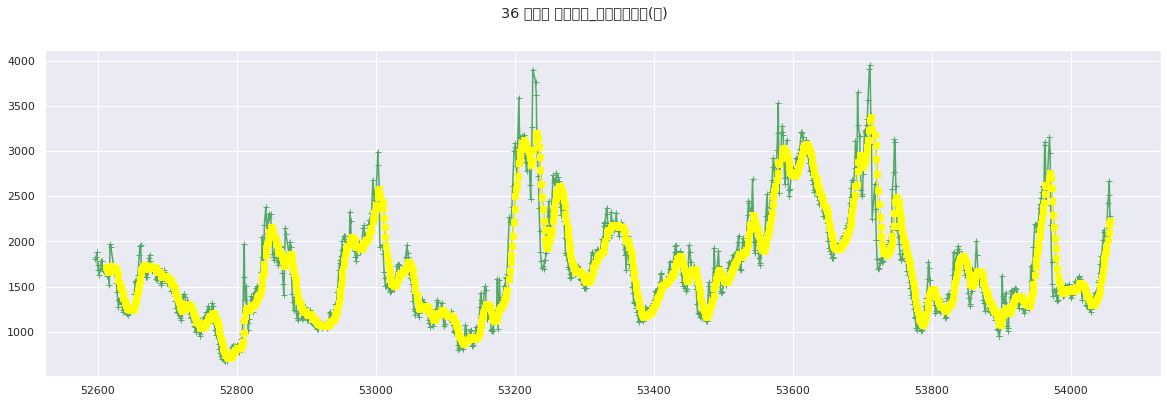

In [15]:
import talib as tb
df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv')
for i in range(37):
  df2 = df[df['품목']==i]
  df2['해당일자_전체평균가격(원)'].replace(0,np.nan, inplace = True)
  df2.dropna(axis=0, inplace=True)
  df2['price'] = df['해당일자_전체평균가격(원)']
  df2['wma7'] =  tb.WMA(df2['price'], 7)
  df2['wma14'] =  tb.WMA(df2['price'], 14)
  df2['wma13'] =  tb.WMA(df2['price'], 13)
  df2['wma12'] =  tb.WMA(df2['price'], 12)
  df2['wma28'] =  tb.WMA(df2['price'], 28)
  df2['wma10'] =  tb.WMA(df2['price'], 10)
  plt.figure(figsize=(20,6))
  plt.plot(df2['price'], marker='+', color='g')
  plt.plot(df2['wma14'],  marker='*', color='b')
  plt.plot(df2['wma14'],  marker='s', color='yellow')
  # plt.plot(df2['price'].rolling(14).mean(),  marker='*', color='red')
  # plt.plot(df2['wma28'])


  # df2['wma7'].plot(kind='line')
  # df2['wma14'].plot(kind='line')
  # df2['wma28'].plot(kind='line')
  # df2['price'].plot(kind='line')
  plt.suptitle(f'{i} 품목의 해당일자_전체평균가격(원)')
  plt.show()
  plt.close()

- wma 변환한거 로그스케일링까지 해보기

In [ ]:
# 로그 스케일링
df = pd.read_csv('/content/drive/MyDrive/농산물예측/real_real_final_concat.csv')
for i in range(37):
  df2 = df[df['품목']==i]
  df2['price'] = np.log1p(df['해당일자_전체평균가격(원)'])
  df2['wma7'] =  np.log1p(tb.WMA(df2['해당일자_전체평균가격(원)'], 7))
  df2['wma14'] =  np.log1p(tb.WMA(df2['해당일자_전체평균가격(원)'], 14))
  df2['wma28'] =  np.log1p(tb.WMA(df2['해당일자_전체평균가격(원)'], 28))

  plt.figure(figsize=(20,6))
  plt.plot(df2['price'], marker='+', color='g')
  # plt.plot(df2['wma7'],  marker='s', color='yellow')
  # plt.plot(df2['wma28'],  marker='*', color='r')
  # plt.plot(df2['wma28']*1.2,  marker='*', color='r')
  # plt.plot(df2['price'].rolling(28).mean(),  marker='*', color='yellow')
  plt.plot(df2['wma14'],  marker='*', color='b')
  # plt.plot(df2['price'].rolling(14).mean(),  marker='*', color='red')
  # plt.plot(df2['wma28'])


  # df2['wma7'].plot(kind='line')
  # df2['wma14'].plot(kind='line')
  # df2['wma28'].plot(kind='line')
  # df2['price'].plot(kind='line')
  plt.suptitle(f'{i} 품목의 해당일자_전체평균가격(원)')
  plt.show()
  plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
tb.WMA(np.asarray([2.,2.,2.,10.,10.,10.]), 5)

array([nan, nan, nan, nan, 6.8, 8.4])

In [ ]:
tb.MA(np.asarray([2.,2.,2.,10.,10.,10.]), 5)

array([nan, nan, nan, nan, 5.2, 6.8])

In [ ]:
tb.SMA(np.asarray([2.,2.,2.,10.,10.,10.]), 5)

array([nan, nan, nan, nan, 5.2, 6.8])

## Fourier Transform
- 푸리에 변환 
- 어떤 복잡한 파동이라도 진동수와 진폭이 다른 간단한 파동들의 합으로 나타낼 수 있다는 것을 증명. 이를 잡음 제거에 활용하면 시간 차원에서 발생한 가격을 주파수 차원으로 변환하여 특정 상위 파동들의 합(예시에서는 상위7개)을 계산하고 다시 시간 차원으로 변환. 이를 통해 잡음을 제거하여 올바른 신호를 포착할 수 있다.

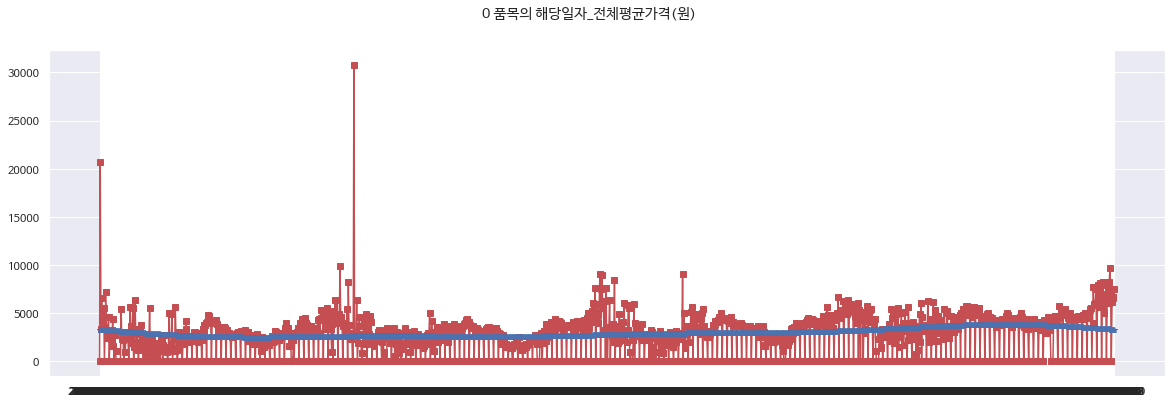

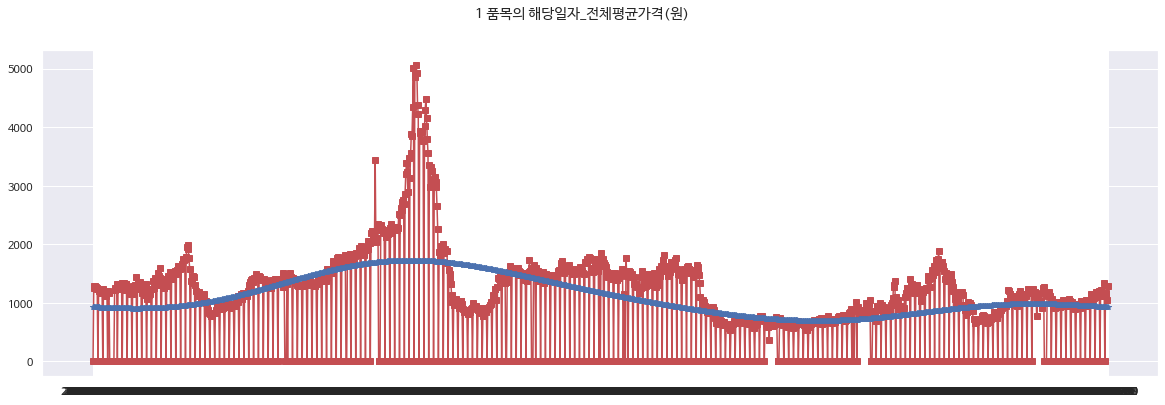

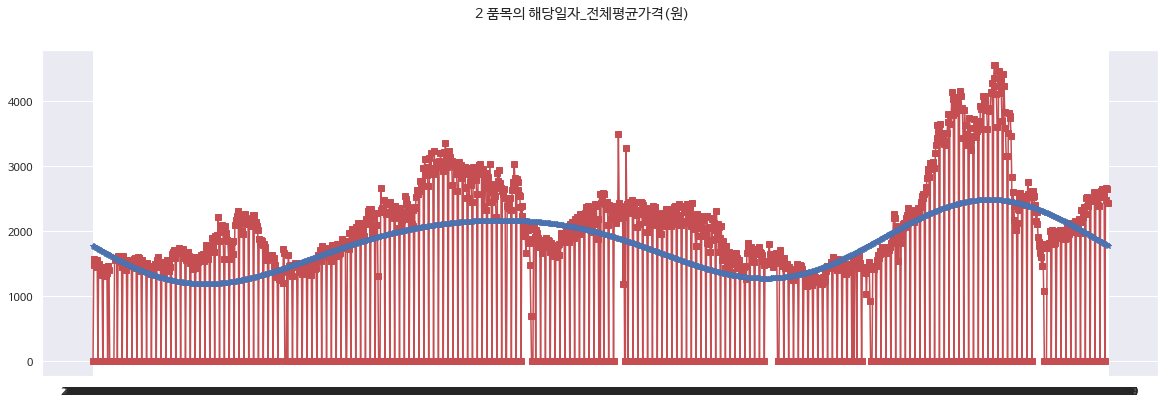

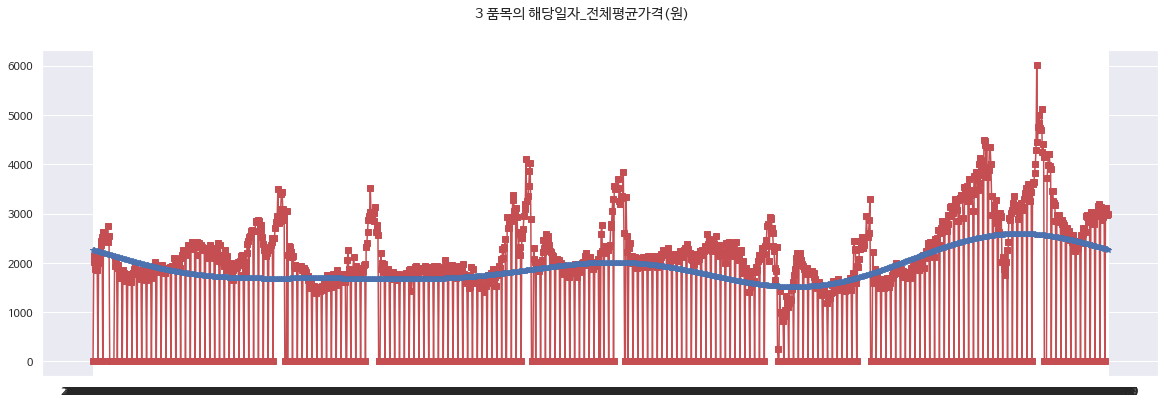

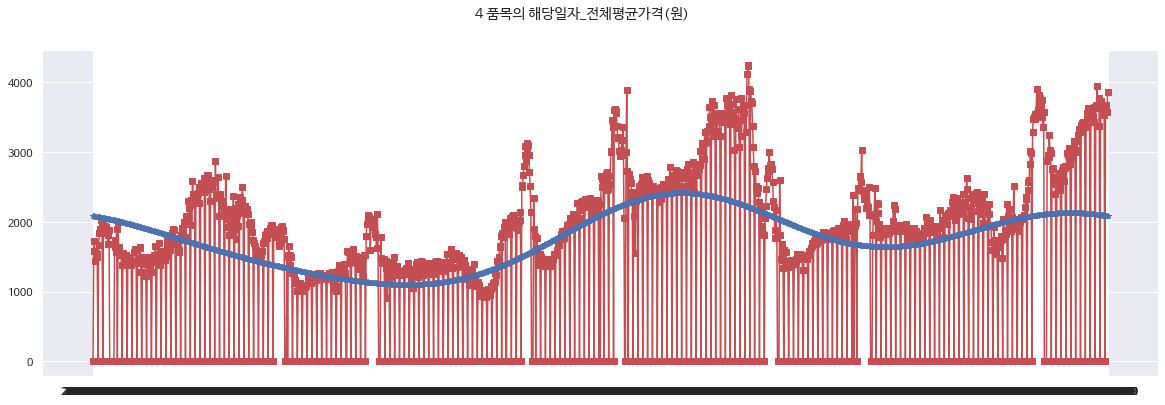

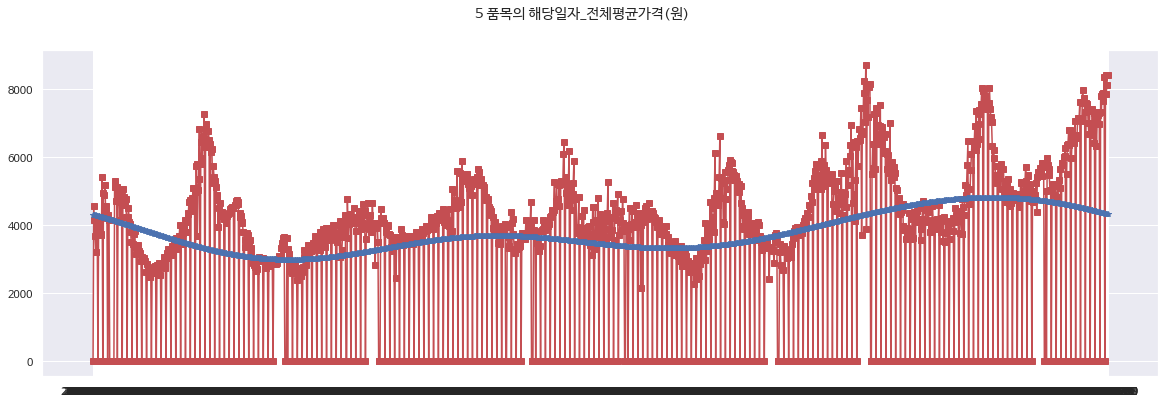

KeyboardInterrupt: ignored

In [ ]:
def FFT(df, col, topn=2):
    fft = np.fft.fft(df[col])
    fft[topn:-topn] = 0
    ifft = np.fft.ifft(fft)
    return ifft


df3 = df[['datadate', '해당일자_전체평균가격(원)' ,'품목']]
for i in range(37):
  df4 = df3[df3['품목']==i]
  df4['FFT(30)'] = FFT(df4, '해당일자_전체평균가격(원)', 3)

  plt.figure(figsize=(20, 6))
  plt.plot(df4['datadate'], df4['해당일자_전체평균가격(원)'], marker='s', color='r')
  plt.plot(df4['datadate'], df4['FFT(30)'], marker='*', color='b')
  plt.suptitle(f'{i} 품목의 해당일자_전체평균가격(원)')
  plt.show()
  plt.close()

## Wavelet Transfrom
- 웨이블릿 변환(Wavelet Transform)은 푸리에 변환의 단점을 해소하고자 개발되었고 고주파 성분 신호에 대해서는 주파수 해상도를 높이고 시간 해상도를 낮추는 한편 저주파 성분 신호에 대해서는 주파수 해상도를 낮추고 시간 해상도를 높이는 웨이블릿 함수를 사용한다.
- 이렇듯 웨이블릿 변환은 시간의 확장과 축소하는 Scaling과 시간 축으로 이동되는 Shifting이 핵심이다.
- 또한 동일한 자료를 분석하더라도 모 웨이블릿의 선택에 따라 결과가 달라지기 때문에 데이터 특성에 맞는 모 웨이블릿을 잘 선택해야하며 이산 웨이블릿 변환을 위해 Haar, Daubechies 등을 많이 사용한다.
- 본 예제는 Daubechies를 사용.

In [ ]:
# import pywt
# def WT(df, col, wavelet='db5', thresh=0.63):
#     signal = df[col].values
#     thresh = thresh*np.nanmax(signal)
#     coeff = pywt.wavedec(signal, wavelet, mode="per" )
#     coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
#     reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )


# df3 = df[['datadate', '해당일자_전체평균가격(원)' ,'품목']]
# for i in range(37):
#   df4 = df3[df3['품목']==i]
#   df4['wt'] = WT(df4, '해당일자_전체평균가격(원)')

#   plt.figure(figsize=(20, 6))
#   plt.plot(df4['datadate'], df4['해당일자_전체평균가격(원)'], marker='s', color='r')
#   plt.plot(df4['datadate'], df4['wt'], marker='*', color='b')
#   plt.suptitle(f'{i} 품목의 해당일자_전체평균가격(원)')
#   plt.show()
#   plt.close()

## autoencoder

# data_preprocessing
- feature_selection하는 코드
- 다른컬럼들 스케일링(어떤거 할지는 아직 미정)
- 타겟 데이터 가공
  - wma 14일
  - rolling(14)
  - * 몇할지(아웃라이어도 잡아주면서 loss는 차이가 안나도록)
  - 로그 스케일링

- 